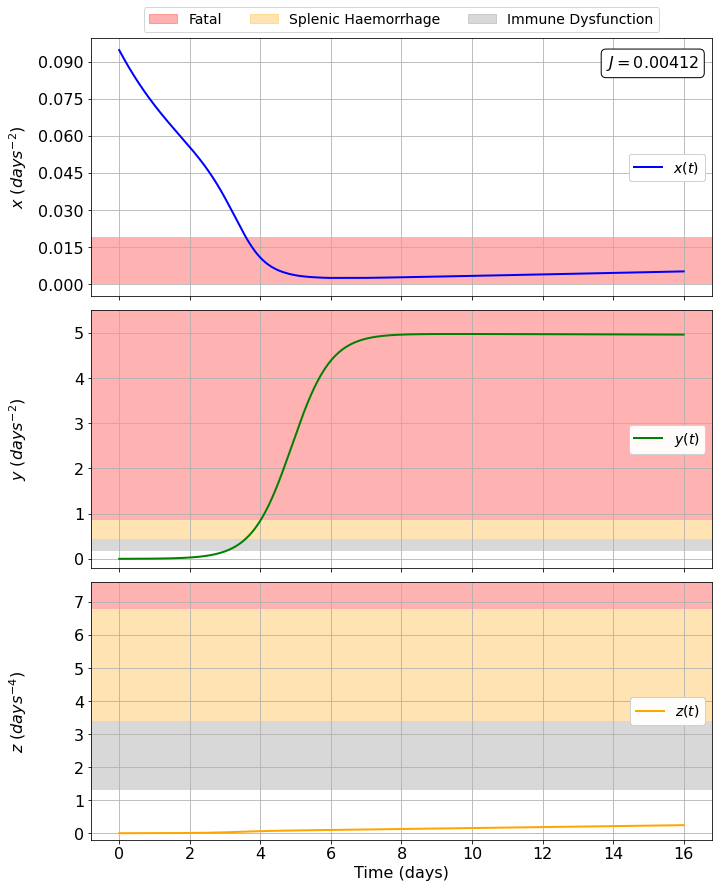

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter, MaxNLocator
from matplotlib.lines import Line2D


def custom_formatter(x, pos):
    return f'{x/10:.0f}'

formatter = FuncFormatter(custom_formatter)


s = 1.3e4
f = 1e6
g = 2e7
d = 0.0412
a = 0.18
b = 2e-9
k1 = 1e-8
k2 = k1 * 1e7
k3 = k1 * 1e2

chi   = 1 / (k2 + k3)
beta  = 1 / (k2 * k1)
alpha = 1 / (k3 * k1)
gamma = 1 / (k1 * k2 * k3 * (k2 + k3))

h_val = s * chi / gamma
i_val = f * chi
j_val = d * chi * alpha / gamma
l_val = k1 * chi * alpha * beta / gamma
m_val = k2 * chi
n_val = a * b * chi * alpha * beta / gamma
r_val = a * chi * alpha / gamma
p_val = a * b * chi * alpha
q_val = (k1 * chi * alpha**2) / gamma
v_val = k3 * chi * alpha / beta

epsilon = 1e-2
lambd = 1e7
sigma = 10
nu = 1e9


H = lambd * h_val
I = lambd * sigma * i_val / nu
G = g * 10

J = 0.00412  
L = l_val / sigma
M = m_val * lambd / nu
W = 10
R = r_val
N = n_val / sigma
Q = q_val / lambd
P = p_val / nu
V = v_val * sigma / nu


def ode_system(t, vars):
    x, y, z = vars
    dxdt = 10*(H + I * z / (G + beta * y) - J * x - L * x * y + M * z)
    dydt = 10*(R * y - N * y**2 - P * y * z - Q * x * y + V * z)
    dzdt = 10*(epsilon * (W * x * y - z))
    return [dxdt, dydt, dzdt]


initial_conditions = [3*H/J, 0.03*H/J, 0]
t_span = (0, 160)
t_eval = np.linspace(t_span[0], t_span[1], 100000)


sol = solve_ivp(ode_system, t_span, initial_conditions, method='RK45', t_eval=t_eval)


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True)


for ax in axes:
    ax.yaxis.set_major_locator(MaxNLocator(nbins=10, integer=True))
    ax.tick_params(axis='both', labelsize=16)
    ax.yaxis.set_label_coords(-0.1, 0.5)  


red_patch = mpatches.Patch(color='red', alpha=0.3, label='Fatal')
orange_patch = mpatches.Patch(color='orange', alpha=0.3, label='Splenic Haemorrhage')
grey_patch = mpatches.Patch(color='grey', alpha=0.3, label='Immune Dysfunction')
patch_handles = [red_patch, orange_patch, grey_patch]


ax = axes[0]
line_x, = ax.plot(sol.t, sol.y[0], label=r'$x(t)$', color='blue', linewidth=2)
ax.axhspan(0, 0.2*3*H/J, facecolor='red', alpha=0.3)
ax.set_ylabel(r'$x$ ($days^{-2}$)', fontsize=16)
ax.grid(True)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.offsetText.set_visible(False)

patch_leg = ax.legend(handles=patch_handles, loc='upper center',
                      bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=14)
ax.add_artist(patch_leg)  

line_leg = ax.legend(handles=[line_x], loc='center right', fontsize=14)
ax.add_artist(line_leg)

ax.text(0.98, 0.94, r'$J = 0.00412$', transform=ax.transAxes, fontsize=16, 
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))


ax = axes[1]
line_y, = ax.plot(sol.t, sol.y[1], label=r'$y(t)$', color='green', linewidth=2)
ax.axhspan(0.17, 0.43, facecolor='grey', alpha=0.3)
ax.axhspan(0.43, 0.85, facecolor='orange', alpha=0.3)
ax.axhspan(0.85, 5.5, facecolor='red', alpha=0.3)
ax.set_ylabel(r'$y$ ($days^{-2}$)', fontsize=16)
ax.grid(True)
ax.set_ylim(-0.2, 5.5)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.offsetText.set_visible(False)

patch_leg = ax.legend(handles=patch_handles, loc='upper center',
                      bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=14)

line_leg = ax.legend(handles=[line_y], loc='center right', fontsize=14)
ax.add_artist(line_leg)


ax = axes[2]
line_z, = ax.plot(sol.t, sol.y[2], label=r'$z(t)$', color='orange', linewidth=2)
ax.axhspan(1.3, 3.4, facecolor='grey', alpha=0.3)
ax.axhspan(3.4, 6.8, facecolor='orange', alpha=0.3)
ax.axhspan(6.8, 7.6, facecolor='red', alpha=0.3)
ax.set_xlabel('Time (days)', fontsize=16)
ax.set_ylabel(r'$z$ ($days^{-4}$)', fontsize=16)
ax.set_ylim(-0.2, 7.6)
ax.grid(True)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.offsetText.set_visible(False)

line_leg = ax.legend(handles=[line_z], loc='center right', fontsize=14)
ax.add_artist(line_leg)

plt.tight_layout()
plt.show()


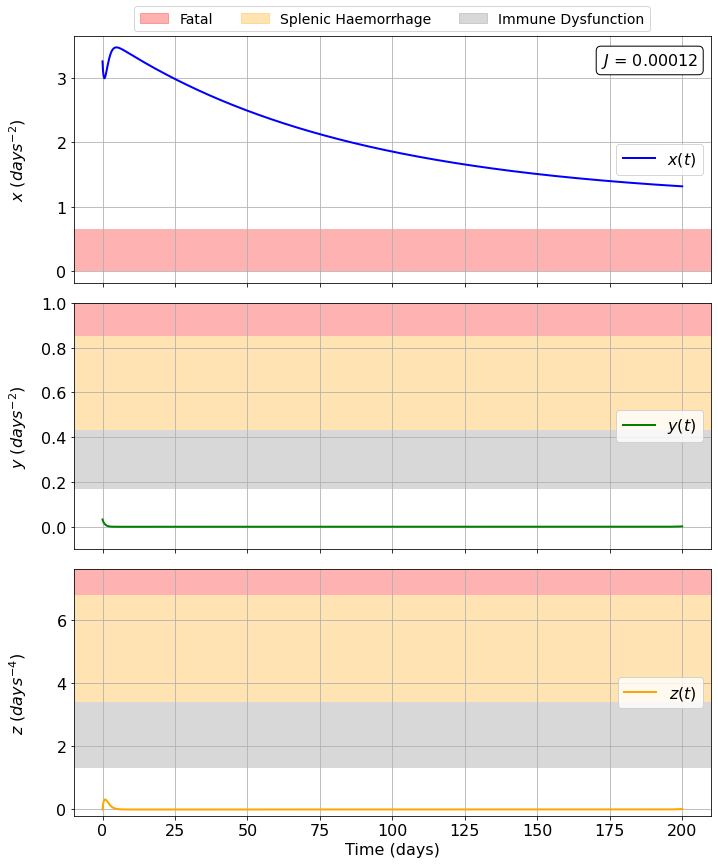

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter


s = 1.3e4
f = 1e6
g = 2e7
d = 0.0412
a = 0.18
b = 2e-9
k1 = 1e-8
k2 = k1 * 1e7
k3 = k1 * 1e2

chi   = 1 / (k2 + k3)
beta  = 1 / (k2 * k1)
alpha = 1 / (k3 * k1)
gamma = 1 / (k1 * k2 * k3 * (k2 + k3))

h_val = s * chi / gamma
i_val = f * chi
j_val = d * chi * alpha / gamma
l_val = k1 * chi * alpha * beta / gamma
m_val = k2 * chi
n_val = a * b * chi * alpha * beta / gamma
r_val = a * chi * alpha / gamma
p_val = a * b * chi * alpha
q_val = (k1 * chi * alpha**2) / gamma
v_val = k3 * chi * alpha / beta

epsilon = 1e-2
lambd = 1e7
sigma = 10
nu = 1e9


H = lambd * h_val
I = lambd * sigma * i_val / nu
G = g * 10

J = 0.00412  
J = 0.00012  
L = l_val / sigma
M = m_val * lambd / nu
W = 10
R = r_val
N = n_val / sigma
Q = q_val / lambd
P = p_val / nu
V = v_val * sigma / nu


def ode_system(t, vars):
    x, y, z = vars
    dxdt = 10*(H + I * z / (G + beta * y) - J * x - L * x * y + M * z)
    dydt = 10*(R * y - N * y**2 - P * y * z - Q * x * y + V * z)
    dzdt = 10*(epsilon * (W * x * y - z))
    return [dxdt, dydt, dzdt]


initial_conditions = [3*H/J, 1*0.03*H/J, 0]
t_span = (0, 1800)
t_span = (0, 2000)
t_eval = np.linspace(t_span[0], t_span[1], 1000000)


sol = solve_ivp(ode_system, t_span, initial_conditions, method='RK45', t_eval=t_eval)


def custom_formatter(x, pos):
    return f'{x/10:.0f}'

formatter = FuncFormatter(custom_formatter)


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True)
for ax in axes:
    ax.tick_params(axis='both', labelsize=16)
    ax.yaxis.set_label_coords(-0.07, 0.5)  


ax = axes[0]

ax.plot(sol.t, sol.y[0], label=r'$x(t)$', color='blue', linewidth=2)
ax.axhspan(0, 0.2*3*H/J, facecolor='red', alpha=0.3)
ax.set_ylabel(r'$x$ ($days^{-2}$)', fontsize=16)
ax.grid(True)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.offsetText.set_visible(False)

line_legend = ax.legend(loc='center right', fontsize=16)

red_patch = mpatches.Patch(color='red', alpha=0.3, label='Fatal')
orange_patch = mpatches.Patch(color='orange', alpha=0.3, label='Splenic Haemorrhage')
grey_patch = mpatches.Patch(color='grey', alpha=0.3, label='Immune Dysfunction')
patch_legend = ax.legend(handles=[red_patch, orange_patch, grey_patch],
                         loc='upper center', bbox_to_anchor=(0.5, 1.15),
                         ncol=3, fontsize=14)

ax.add_artist(line_legend)

ax.text(0.98, 0.94, f'$J$ = {J:.5f}', transform=ax.transAxes, fontsize=16, 
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))


ax = axes[1]
ax.plot(sol.t, sol.y[1], label=r'$y(t)$', color='green', linewidth=2)
ax.axhspan(0.17, 0.43, facecolor='grey', alpha=0.3)
ax.axhspan(0.43, 0.85, facecolor='orange', alpha=0.3)
ax.axhspan(0.85, 1, facecolor='red', alpha=0.3)
ax.set_ylabel(r'$y$ ($days^{-2}$)', fontsize=16)
ax.grid(True)
ax.set_ylim(-0.1, 1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.offsetText.set_visible(False)

ax.legend(loc='center right', fontsize=16)


ax = axes[2]
ax.plot(sol.t, sol.y[2], label=r'$z(t)$', color='orange', linewidth=2)
ax.axhspan(1.3, 3.4, facecolor='grey', alpha=0.3)
ax.axhspan(3.4, 6.8, facecolor='orange', alpha=0.3)
ax.axhspan(6.8, 7.6, facecolor='red', alpha=0.3)
ax.set_xlabel('Time (days)', fontsize=16)
ax.set_ylabel(r'$z$ ($days^{-4}$)', fontsize=16)
ax.grid(True)
ax.set_ylim(-0.2, 7.6)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.offsetText.set_visible(False)

ax.legend(loc='center right', fontsize=16)

plt.tight_layout()
plt.show()


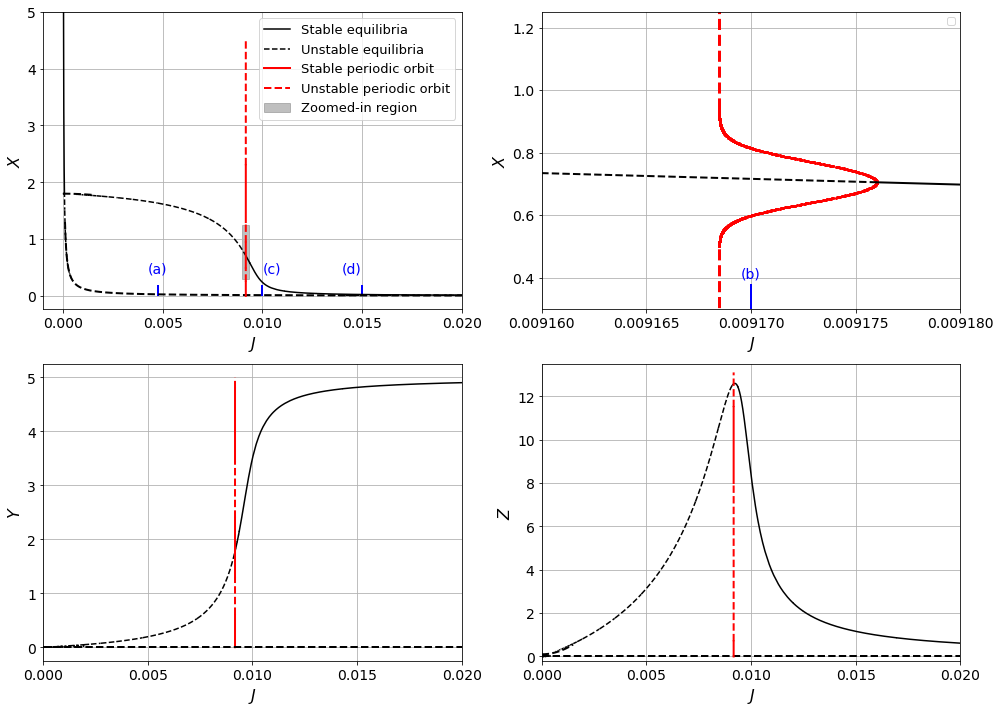

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
import matplotlib.gridspec as gridspec
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch, Rectangle
import matplotlib.lines as mlines

def sort_and_plot_segmented(J_vals, Y_vals, color, linestyle, label=None,
                            max_gap=1, max_gap_y=0.05, lw=1.0,
                            apply_medfilt=True, kernel_size=3):
    if apply_medfilt:
        Y_smooth = medfilt(Y_vals, kernel_size=kernel_size)
    else:
        Y_smooth = Y_vals.copy()
    
    sorted_idx = np.argsort(J_vals)
    J_sorted = J_vals[sorted_idx]
    Y_sorted = Y_vals[sorted_idx]
    Y_smooth_sorted = Y_smooth[sorted_idx]
    
    segments_J = []
    segments_Y = []
    
    seg_J = [J_sorted[0]]
    seg_Y = [Y_sorted[0]]
    
    for i in range(1, len(J_sorted)):
        if (J_sorted[i]-J_sorted[i-1] <= max_gap) and (abs(Y_smooth_sorted[i]-Y_smooth_sorted[i-1]) <= max_gap_y):
            seg_J.append(J_sorted[i])
            seg_Y.append(Y_sorted[i])
        else:
            segments_J.append(np.array(seg_J))
            segments_Y.append(np.array(seg_Y))
            seg_J = [J_sorted[i]]
            seg_Y = [Y_sorted[i]]
    segments_J.append(np.array(seg_J))
    segments_Y.append(np.array(seg_Y))
    
    first_label = True
    for j_seg, y_seg in zip(segments_J, segments_Y):
        if len(j_seg) > 1:
            if first_label and label is not None:
                plt.plot(j_seg, y_seg, color=color, linestyle=linestyle, lw=lw, label=label)
                first_label = False
            else:
                plt.plot(j_seg, y_seg, color=color, linestyle=linestyle, lw=lw)

def plot_upper_line(J_vals, branch1, branch2, color, linestyle, label=None,
                    j_min=0, j_max=0.0075, lw=2.0):
    mask = (J_vals > j_min) & (J_vals < j_max)
    if np.any(mask):
        J_filtered = J_vals[mask]
        b1_filtered = branch1[mask]
        b2_filtered = branch2[mask]
        upper = np.maximum(b1_filtered, b2_filtered)
        sort_and_plot_segmented(J_filtered, upper, color=color, linestyle=linestyle, label=label, lw=lw)


plt.figure(figsize=(14,10))
plt.subplot(2,2,1)

ax1 = plt.gca()

data = np.loadtxt("diagramx.dat")
J    = data[:, 0]
X1   = data[:, 1]
X2   = data[:, 2]
types = data[:, 3]

mask = (types == 1)
if np.any(mask):
    sort_and_plot_segmented(J[mask], X1[mask], color='black', linestyle='-', 
                            label=r"Stable equilibria", lw=1.5)
mask = (types == 2)
if np.any(mask):
    sort_and_plot_segmented(J[mask], X1[mask], color='black', linestyle='--', 
                            label=r"Unstable equilibria", lw=1.5)
mask_lim = ((types == 3) | (types == 4))
if np.any(mask_lim):
    plot_upper_line(J[mask_lim], X1[mask_lim], X2[mask_lim],
                    color='blue', linestyle='-', label='Upper branch X', lw=2.0)

s = 1.3e4
k1 = 1e-8; k2 = k1*1e7; k3 = k1*1e2
chi = 1/(k2+k3)
gamma = 1/(k1*k2*k3*(k2+k3))
lambd = 1e7
H = lambd*(s*chi/gamma)
x_line = np.linspace(0.0001, 1, 100000)
y_line = H/x_line
oops = np.linspace(0, 0.0015, 1000)
heyy = 1.8 - 10000*oops**2
plt.plot(x_line, y_line, color='black', linestyle='--', linewidth=2)
plt.plot(oops, heyy, color='black', linestyle='--', linewidth=2)


hopf = [0.00917094]*100000
hopf1 = np.linspace(0.0,0.25,100000)
hopf2 = np.linspace(0.25,0.5,100000)
hopf3 = np.linspace(0.5,0.94,100000)
hopf4 = np.linspace(0.94,1.3,100000)
hopf5 = np.linspace(1.3,2.3,100000)
hopf6 = np.linspace(2.3,4.5,100000)
plt.plot(hopf, hopf1, color='red', linestyle='-', linewidth=2, label="Stable periodic orbit")
plt.plot(hopf, hopf2, color='red', linestyle='--', linewidth=2, label="Unstable periodic orbit")
plt.plot(hopf, hopf3, color='red', linestyle='-', linewidth=2)
plt.plot(hopf, hopf4, color='red', linestyle='--', linewidth=2)
plt.plot(hopf, hopf5, color='red', linestyle='-', linewidth=2)
plt.plot(hopf, hopf6, color='red', linestyle='--', linewidth=2)

plt.xlabel(r"$J$", fontsize=16)
plt.ylabel(r"$X$", fontsize=16)

plt.xlim(-0.001, 0.02)
plt.ylim(-0.23, 5)
plt.grid()
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=13)
plt.locator_params(axis='x', nbins=5)


from matplotlib.patches import Rectangle
zoom_patch = Rectangle((0.0090, 0.3), 0.00935 - 0.0090, 1.25 - 0.3,
                       linewidth=1, edgecolor='grey', facecolor='grey', alpha=0.5)
plt.gca().add_patch(zoom_patch)


handles, labels = plt.gca().get_legend_handles_labels()


handles.append(zoom_patch)
labels.append('Zoomed-in region')


plt.legend(handles, labels, fontsize=13)



j_a = 0.004755
j_b = 0.00917  
j_c = 0.01
j_d = 0.015
ax1.vlines(x=j_a, ymin=0, ymax=0.2, colors='blue', linestyles='-', linewidth=2)
ax1.vlines(x=j_c, ymin=0, ymax=0.2, colors='blue', linestyles='-', linewidth=2)
ax1.vlines(x=j_d, ymin=0, ymax=0.2, colors='blue', linestyles='-', linewidth=2)

ax1.text(j_a, 0.4, "(a)", fontsize=14, color='blue', ha='center')
ax1.text(j_c + 0.0005, 0.4, "(c)", fontsize=14, color='blue', ha='center')
ax1.text(j_d-0.0005, 0.4, "(d)", fontsize=14, color='blue', ha='center')


plt.subplot(2,2,4)
data = np.loadtxt("diagramz.dat")
J   = data[:, 0]
Y1  = data[:, 1]
Y2  = data[:, 2]
types = data[:, 3]

mask = (types == 1)
if np.any(mask):
    sort_and_plot_segmented(J[mask], Y1[mask], color='black', linestyle='-', lw=1.5)
mask = (types == 2)
if np.any(mask):
    sort_and_plot_segmented(J[mask], Y1[mask], color='black', linestyle='--', lw=1.5)
mask_lim = ((types == 3) | (types == 4))
if np.any(mask_lim):
    plot_upper_line(J[mask_lim], Y1[mask_lim], Y2[mask_lim],
                    color='blue', linestyle='-', label='Upper branch Z', lw=2.0)
plt.xlabel(r"$J$", fontsize=16)
plt.ylabel(r"$Z$", fontsize=16)

plt.xlim(0, 0.02)
plt.ylim(-0.2, 13.5)
plt.grid()
plt.axhline(0, color='black', linewidth=2, linestyle='--')
oops = np.linspace(0, 0.0015, 1000)
heyy = 0.1 + 200000*oops**2
hopf = [0.00917094]*100000
hopf1 = np.linspace(0.0, 0.7, 100000)
hopf2 = np.linspace(0.7, 8, 100000)
hopf3 = np.linspace(8, 11.5, 100000)
hopf4 = np.linspace(11.5, 13.1, 100000)
plt.plot(hopf, hopf1, color='red', linestyle='-', linewidth=2)
plt.plot(hopf, hopf2, color='red', linestyle='--', linewidth=2)
plt.plot(hopf, hopf3, color='red', linestyle='-', linewidth=2)
plt.plot(hopf, hopf4, color='red', linestyle='--', linewidth=2)

oops = np.linspace(0, 0.0015, 1000)
heyy = 0.1 + 200000*oops**2
plt.plot(oops, heyy, color='black', linestyle='--', linewidth=2)


plt.tick_params(axis='both', labelsize=14)
plt.locator_params(axis='x', nbins=5)


plt.subplot(2,2,3)
data = np.loadtxt("diagramy.dat")
J   = data[:, 0]
Z1  = data[:, 1]
Z2  = data[:, 2]
types = data[:, 3]

mask = (types == 1)
if np.any(mask):
    sort_and_plot_segmented(J[mask], Z1[mask], color='black', linestyle='-', lw=1.5)
mask = (types == 2)
if np.any(mask):
    sort_and_plot_segmented(J[mask], Z1[mask], color='black', linestyle='--', lw=1.5)
mask_lim = ((types == 3) | (types == 4))
if np.any(mask_lim):
    plot_upper_line(J[mask_lim], Z1[mask_lim], Z2[mask_lim],
                    color='blue', linestyle='-', label='Upper branch Y', lw=2.0)
    
hopf = [0.00917094]*100000
hopf1 = np.linspace(0.0, 0.6, 100000)
hopf2 = np.linspace(0.6, 1.3, 100000)
hopf3 = np.linspace(1.3, 2.4, 100000)
hopf4 = np.linspace(2.4, 3.45, 100000)
hopf5 = np.linspace(3.45, 4.8, 100000)
hopf6 = np.linspace(4.8, 5, 100000)
plt.plot(hopf, hopf1, color='red', linestyle='-', linewidth=2)
plt.plot(hopf, hopf2, color='red', linestyle='--', linewidth=2)
plt.plot(hopf, hopf3, color='red', linestyle='-', linewidth=2)
plt.plot(hopf, hopf4, color='red', linestyle='--', linewidth=2)
plt.plot(hopf, hopf5, color='red', linestyle='-', linewidth=2)
plt.plot(hopf, hopf6, color='red', linestyle='--', linewidth=2)


plt.xlabel(r"$J$", fontsize=16)
plt.ylabel(r"$Y$", fontsize=16)

plt.xlim(0, 0.02)
plt.grid()
plt.axhline(0, color='black', linewidth=2, linestyle='--')
plt.tick_params(axis='both', labelsize=14)
plt.locator_params(axis='x', nbins=5)


plt.subplot(2,2,2)

ax4 = plt.gca()

data = np.loadtxt("diagramx.dat")
J    = data[:, 0]
X1   = data[:, 1]
X2   = data[:, 2]
types = data[:, 3]

mask3 = (types == 3)
if np.any(mask3):
    idx3 = np.argsort(J[mask3])
    J3_sorted   = J[mask3][idx3]
    X1_3_sorted = X1[mask3][idx3]
    X2_3_sorted = X2[mask3][idx3]
    valid_mask1 = (X1_3_sorted >= 0.5) & (X1_3_sorted <= 0.94)
    valid_mask2 = (X2_3_sorted >= 0.5) & (X2_3_sorted <= 0.94)
    plt.plot(J3_sorted[valid_mask1], X1_3_sorted[valid_mask1],
             'ro', markersize=2)
    plt.plot(J3_sorted[valid_mask2], X2_3_sorted[valid_mask2],
             'ro', markersize=2)

s = 1.3e4
k1 = 1e-8; k2 = k1*1e7; k3 = k1*1e2
chi = 1/(k2+k3)
gamma = 1/(k1*k2*k3*(k2+k3))
lambd = 1e7
H = lambd*(s*chi/gamma)
x_line  = np.linspace(0.001,0.009176,100000)
const_y = np.full(100000,0.71)
const_y = 9.125 -100000*x_line**2
x_line1 = np.linspace(0.009176,0.00918,100000)
const_y2 = np.full(100000,0.71)
const_y2 = 9.125 -100000*x_line1**2
plt.plot(x_line, const_y, color='black', linewidth=2, linestyle='--')
plt.plot(x_line1, const_y2, color='black', linewidth=2, linestyle='-')
plt.xlabel(r"$J$", fontsize=16)
plt.ylabel(r"$X$", fontsize=16)

plt.grid()
plt.xlim(0.00916,0.00918)
plt.ylim(0.3,1.25)
shucks1 = np.linspace(0,0.5,10)
shucks2 = np.linspace(0.94,2,10)
ghf = [0.00916849]*10
plt.plot(ghf, shucks1, color='red', linewidth=3, linestyle='--')
plt.plot(ghf, shucks2, color='red', linewidth=3, linestyle='--')
plt.tick_params(axis='both', labelsize=14)
plt.locator_params(axis='x', nbins=5)


ax4.vlines(x=j_b, ymin=0, ymax=0.38, colors='blue', linestyles='-', linewidth=2)
ax4.text(j_b, 0.4, "(b)", fontsize=14, color='blue', ha='center')


handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys())


fig = plt.gcf()

axs = np.array([[fig.axes[0], fig.axes[1]], [fig.axes[2], fig.axes[3]]])


fig.tight_layout()
plt.show()


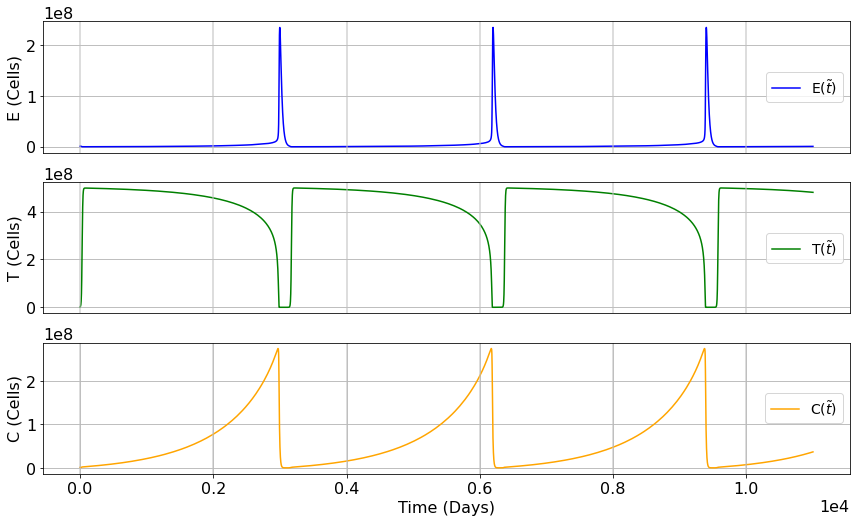

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


s = 10**4
f = 10**6
g = 2 * 10**7
d = 0.04
a = 0.2
b = 2 * 10**-9
k1 = 10**-8
k2 = k1 * 10**7
k3 = k1 * 10**4
k = k1/10


N = 11000  


def system(t, y):
    E, T, C = y  
    dE_dt = s + f * C / (g + T) - d * E - k1 * E * T + (k2+k) * C     
    dT_dt = a * T * (1 - b * (T)) - k1 * E * T + (k+k3) * C           
    dC_dt = k1 * E * T - (k3 + k2+k) * C   
    return [dE_dt, dT_dt, dC_dt]


y0 = [10**6, 10**6, 10**6]


t_span = (0, N)
t_eval = np.linspace(t_span[0], t_span[1], 10000)


sol = solve_ivp(system, t_span, y0, method='RK45', t_eval=t_eval)


from scipy.signal import find_peaks
peaks, _ = find_peaks(sol.y[2])  
vertical_lines = [0, 0.2e4, 0.4e4, 0.6e4, 0.8e4, 1e4]  


plt.figure(figsize=(12, 8))


plt.subplot(3, 1, 1)
plt.plot(sol.t, sol.y[0], label=r'E($\tilde{t}$)', color='blue')
for v in vertical_lines:  
    plt.axvline(x=v, color='silver', linestyle='-', alpha=0.7)  
plt.ylabel(r'E (Cells)', fontsize=16)
plt.legend(loc='center right', fontsize=14)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks([])  


plt.subplot(3, 1, 2)
plt.plot(sol.t, sol.y[1], label=r'T($\tilde{t}$)', color='green')
for v in vertical_lines:  
    plt.axvline(x=v, color='silver', linestyle='-', alpha=0.7)  
plt.ylabel(r'T (Cells)', fontsize=16)
plt.legend(loc='center right', fontsize=14)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks([])  


plt.subplot(3, 1, 3)
plt.plot(sol.t, sol.y[2], label=r'C($\tilde{t}$)', color='orange')
for v in vertical_lines:  
    plt.axvline(x=v, color='silver', linestyle='-', alpha=0.7)  
plt.xlabel(r'Time (Days)', fontsize=16)
plt.ylabel(r'C (Cells)', fontsize=16)
plt.legend(loc='center right', fontsize=14)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)


for ax in plt.gcf().axes:
    ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))
    ax.xaxis.get_offset_text().set_fontsize(16)
    ax.yaxis.get_offset_text().set_fontsize(16)


plt.gcf().align_labels()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


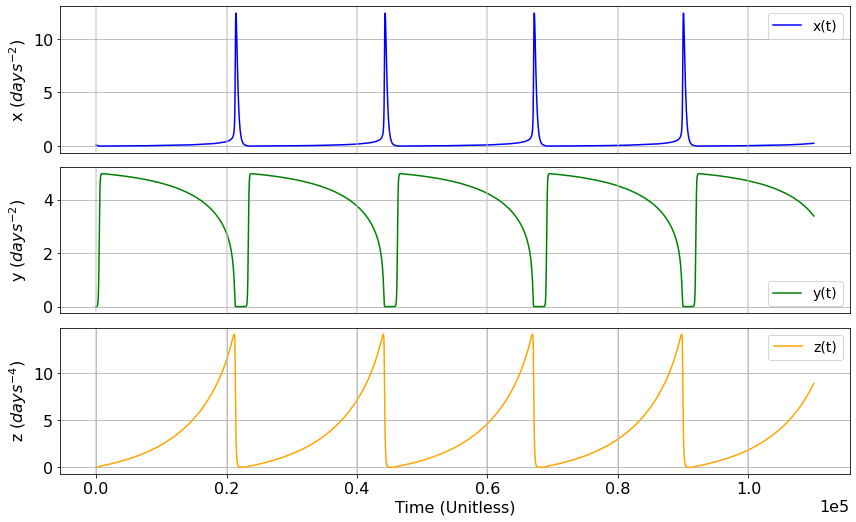

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


s = 1.3e4
f = 1e6
g = 2e7
d = 0.0412
a = 0.18
b = 2e-9
k1 = 1e-8
k2 = k1 * 1e7
k3 = k1 * 1e2

chi   = 1 / (k2 + k3)
beta  = 1 / (k2 * k1)
alpha = 1 / (k3 * k1)
gamma = 1 / (k1 * k2 * k3 * (k2 + k3))

h_val = s * chi / gamma
i_val = f * chi
j_val = d * chi * alpha / gamma
l_val = k1 * chi * alpha * beta / gamma
m_val = k2 * chi
n_val = a * b * chi * alpha * beta / gamma
r_val = a * chi * alpha / gamma
p_val = a * b * chi * alpha
q_val = (k1 * chi * alpha**2) / gamma
v_val = k3 * chi * alpha / beta

epsilon = 1e-2
lambd = 1e7
sigma = 10
nu = 1e9


H = lambd * h_val
I = lambd * sigma * i_val / nu
G = g * 10
J = j_val
L = l_val / sigma
M = m_val * lambd / nu
W = 10
R = r_val
N = n_val / sigma
Q = q_val / lambd
P = p_val / nu
V = v_val * sigma / nu


def ode_system(t, vars):
    x, y, z = vars
    dxdt = H + I * z / (G + beta * y) - J * x - L * x * y + M * z
    dydt = R * y - N * y**2 - P * y * z - Q * x * y + V * z
    dzdt = epsilon * (W * x * y - z)
    return [dxdt, dydt, dzdt]


initial_conditions = [1e-1, 1e-3, 0]
t_span = (0, 110000)
t_eval = np.linspace(t_span[0], t_span[1], 10000)


sol = solve_ivp(ode_system, t_span, initial_conditions, method='RK45', t_eval=t_eval)


vertical_lines = [0, 0.2e5, 0.4e5, 0.6e5, 0.8e5, 1e5]


plt.figure(figsize=(12, 8))


plt.subplot(3, 1, 1)
plt.plot(sol.t, sol.y[0], label='x(t)', color='blue')
for v in vertical_lines:  
    plt.axvline(x=v, color='silver', linestyle='-', alpha=0.7)  
plt.ylabel(r'x ($days^{-2}$)', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks([])  


plt.subplot(3, 1, 2)
plt.plot(sol.t, sol.y[1], label='y(t)', color='green')
for v in vertical_lines:  
    plt.axvline(x=v, color='silver', linestyle='-', alpha=0.7)  
plt.ylabel(r'y ($days^{-2}$)', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks([])  


plt.subplot(3, 1, 3)
plt.plot(sol.t, sol.y[2], label='z(t)', color='orange')
for v in vertical_lines:  
    plt.axvline(x=v, color='silver', linestyle='-', alpha=0.7)  
plt.xlabel(r'Time (Unitless)', fontsize=16)
plt.ylabel(r'z ($days^{-4}$)', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)


for ax in plt.gcf().axes:
    ax.ticklabel_format(axis='x', style='sci', scilimits=(4,5))
    ax.xaxis.get_offset_text().set_fontsize(16)
    ax.yaxis.get_offset_text().set_fontsize(16)


plt.gcf().align_labels()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


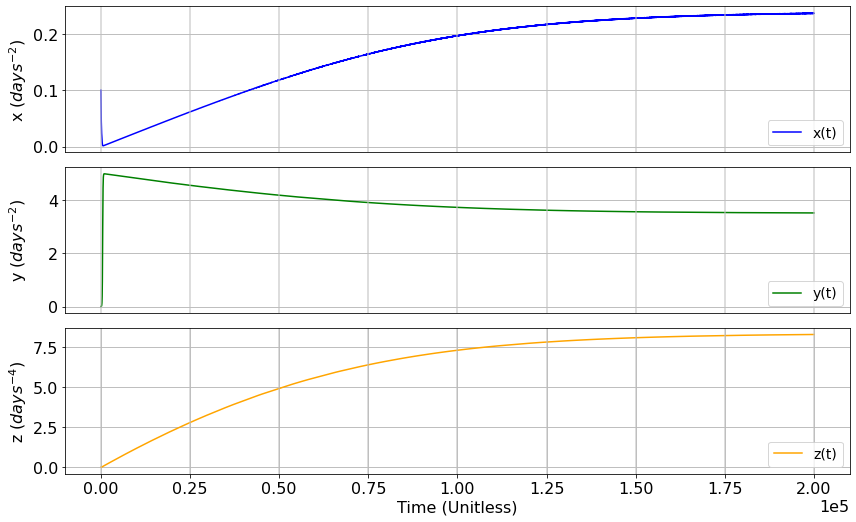

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


s = 1.3e4
f = 1e6
g = 2e7
d = 0.0412
a = 0.18
b = 2e-9
k1 = 1e-8
k2 = k1 * 1e7
k3 = k1 * 1e2

chi   = 1 / (k2 + k3)
beta  = 1 / (k2 * k1)
alpha = 1 / (k3 * k1)
gamma = 1 / (k1 * k2 * k3 * (k2 + k3))

h_val = s * chi / gamma
i_val = f * chi
j_val = d * chi * alpha / gamma
l_val = k1 * chi * alpha * beta / gamma
m_val = k2 * chi
n_val = a * b * chi * alpha * beta / gamma
r_val = a * chi * alpha / gamma
p_val = a * b * chi * alpha
q_val = (k1 * chi * alpha**2) / gamma
v_val = k3 * chi * alpha / beta

epsilon = 1e-2
lambd = 1e7
sigma = 10
nu = 1e9


H = lambd * h_val
I = lambd * sigma * i_val / nu
G = g * 10
J = j_val
J = 0.01
L = l_val / sigma
M = m_val * lambd / nu
W = 10
R = r_val
N = n_val / sigma
Q = q_val / lambd
P = p_val / nu
V = v_val * sigma / nu


def ode_system(t, vars):
    x, y, z = vars
    dxdt = H + I * z / (G + beta * y) - J * x - L * x * y + M * z
    dydt = R * y - N * y**2 - P * y * z - Q * x * y + V * z
    dzdt = epsilon * (W * x * y - z)
    return [dxdt, dydt, dzdt]


initial_conditions = [1e-1, 1e-3, 0]
t_span = (0, 200000)
t_eval = np.linspace(t_span[0], t_span[1], 10000)


sol = solve_ivp(ode_system, t_span, initial_conditions, method='RK45', t_eval=t_eval)


vertical_lines = [0, 0.25e5, 0.5e5, 0.75e5, 1e5, 1.25e5, 1.5e5, 1.75e5, 2e5]


plt.figure(figsize=(12, 8))


plt.subplot(3, 1, 1)
plt.plot(sol.t, sol.y[0], label='x(t)', color='blue')
for v in vertical_lines:  
    plt.axvline(x=v, color='silver', linestyle='-', alpha=0.7)
plt.ylabel(r'x ($days^{-2}$)', fontsize=16)
plt.legend(loc='lower right', fontsize=14)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks([])  


plt.subplot(3, 1, 2)
plt.plot(sol.t, sol.y[1], label='y(t)', color='green')
for v in vertical_lines:  
    plt.axvline(x=v, color='silver', linestyle='-', alpha=0.7)
plt.ylabel(r'y ($days^{-2}$)', fontsize=16)
plt.legend(loc='lower right', fontsize=14)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks([])  


plt.subplot(3, 1, 3)
plt.plot(sol.t, sol.y[2], label='z(t)', color='orange')
for v in vertical_lines:  
    plt.axvline(x=v, color='silver', linestyle='-', alpha=0.7)
plt.xlabel(r'Time (Unitless)', fontsize=16)
plt.ylabel(r'z ($days^{-4}$)', fontsize=16)
plt.legend(loc='lower right', fontsize=14)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)


for ax in plt.gcf().axes:
    ax.ticklabel_format(axis='x', style='sci', scilimits=(4,5))
    ax.xaxis.get_offset_text().set_fontsize(16)
    ax.yaxis.get_offset_text().set_fontsize(16)

plt.gcf().align_labels()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


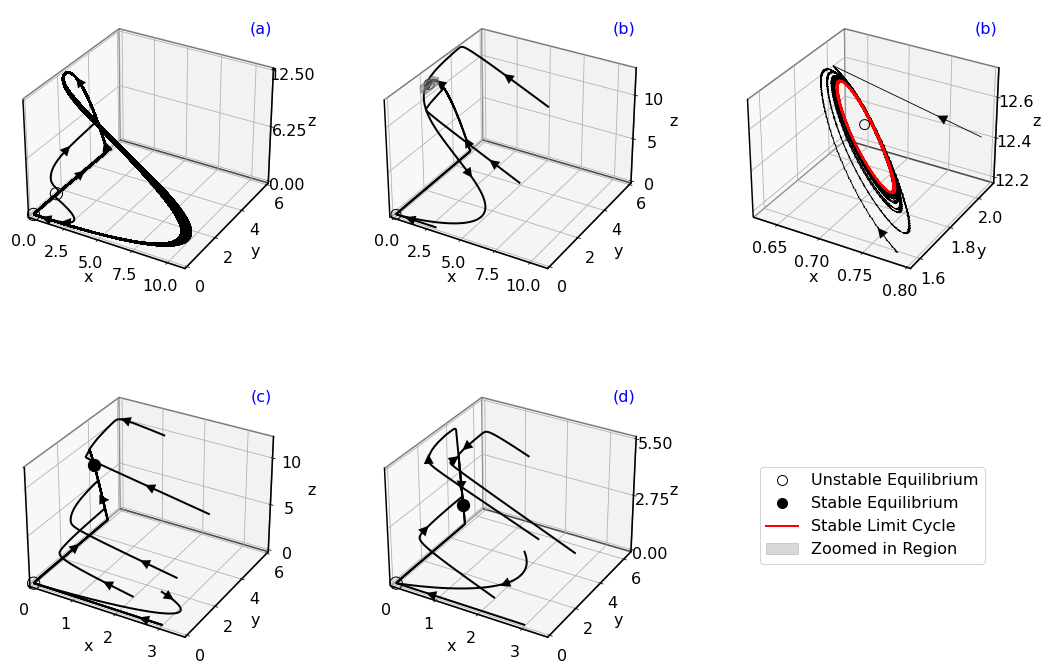

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch, Patch
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        kwargs['lw'] = 0  
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)


s = 1.3e4
f = 1e6
g = 2e7
d = 0.0412
a = 0.18
b = 2e-9
k1 = 1e-8
k2 = k1 * 1e7
k3 = k1 * 1e2

chi   = 1 / (k2 + k3)
beta  = 1 / (k2 * k1)
alpha = 1 / (k3 * k1)
gamma = 1 / (k1 * k2 * k3 * (k2 + k3))

h_val = s * chi / gamma
i_val = f * chi

l_val = k1 * chi * alpha * beta / gamma
m_val = k2 * chi
n_val = a * b * chi * alpha * beta / gamma
r_val = a * chi * alpha / gamma
p_val = a * b * chi * alpha
q_val = (k1 * chi * alpha**2) / gamma
v_val = k3 * chi * alpha / beta

epsilon = 1e-2
lambd = 1e7
sigma = 10
nu = 1e9

H = lambd * h_val
I_param = lambd * sigma * i_val / nu
G = g * 10
L = l_val / sigma
M = m_val * lambd / nu
W = 10
R = r_val
N = n_val / sigma
Q = L / 10
P = p_val / nu
V = v_val * sigma / nu

def ode_system_j(t, vars, J):
    x, y, z = vars
    dxdt = H + I_param * z/(G + beta*y) - J*x - L*x*y + M*z
    dydt = R*y - N*y**2 - P*y*z - Q*x*y + V*z
    dzdt = epsilon*(W*x*y - z)
    return [dxdt, dydt, dzdt]


def plot1(ax):
    
    j_value = 0.00475509
    eq1 = np.array([H/j_value, 0, 0])
    eq2 = np.array([1.6352, 0.17555, 2.87])
    
    perturbations1 = [np.array([0,  0.1, 0]),
                      np.array([3,  0,   0])]
    perturbations2 = [np.array([-0.05, 0.2, 0]),
                      np.array([0.05, -0.2, 0])]
    
    t_span = (0, 2e4)
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    
    def add_direction_arrow(sol, color, arrow_length=0.5):
        mid_index = len(sol.t) // 80
        if mid_index < 1 or mid_index >= len(sol.t)-1:
            return
        x_mid = sol.y[0][mid_index]
        y_mid = sol.y[1][mid_index]
        z_mid = sol.y[2][mid_index]
        dx = sol.y[0][mid_index+1] - sol.y[0][mid_index-1]
        dy = sol.y[1][mid_index+1] - sol.y[1][mid_index-1]
        dz = sol.y[2][mid_index+1] - sol.y[2][mid_index-1]
        norm = np.sqrt(dx**2 + dy**2 + dz**2)
        if norm > 0:
            dx_fixed = arrow_length * dx / norm
            dy_fixed = arrow_length * dy / norm
            dz_fixed = arrow_length * dz / norm
        else:
            dx_fixed = dy_fixed = dz_fixed = 0
        arrow = Arrow3D([x_mid, x_mid+dx_fixed],
                        [y_mid, y_mid+dy_fixed],
                        [z_mid, z_mid+dz_fixed],
                        mutation_scale=25,
                        arrowstyle="-|>",
                        color=color)
        ax.add_artist(arrow)
    
    def add_direction_arrow1(sol, color, arrow_length=0.5):
        mid_index = len(sol.t) // 3
        if mid_index < 1 or mid_index >= len(sol.t)-1:
            return
        x_mid = sol.y[0][mid_index]
        y_mid = sol.y[1][mid_index]
        z_mid = sol.y[2][mid_index]
        dx = sol.y[0][mid_index+1] - sol.y[0][mid_index-1]
        dy = sol.y[1][mid_index+1] - sol.y[1][mid_index-1]
        dz = sol.y[2][mid_index+1] - sol.y[2][mid_index-1]
        norm = np.sqrt(dx**2 + dy**2 + dz**2)
        if norm > 0:
            dx_fixed = arrow_length * dx / norm
            dy_fixed = arrow_length * dy / norm
            dz_fixed = arrow_length * dz / norm
        else:
            dx_fixed = dy_fixed = dz_fixed = 0
        arrow = Arrow3D([x_mid, x_mid+dx_fixed],
                        [y_mid, y_mid+dy_fixed],
                        [z_mid, z_mid+dz_fixed],
                        mutation_scale=25,
                        arrowstyle="-|>",
                        color=color)
        ax.add_artist(arrow)
    
    
    for perturb in perturbations1:
        init_cond = eq1 + perturb
        init_cond = np.maximum(init_cond, 1e-6)
        sol = solve_ivp(lambda t, vars: ode_system_j(t, vars, j_value),
                        t_span, init_cond, method='RK45', t_eval=t_eval)
        ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=2, color='black')
        add_direction_arrow(sol, 'black', arrow_length=0.5)
        add_direction_arrow1(sol, 'black', arrow_length=0.5)
    
    
    for perturb in perturbations2:
        init_cond = eq2 + perturb
        init_cond = np.maximum(init_cond, 1e-6)
        sol = solve_ivp(lambda t, vars: ode_system_j(t, vars, j_value),
                        t_span, init_cond, method='RK45', t_eval=t_eval)
        ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=2, color='black')
        add_direction_arrow(sol, 'black', arrow_length=0.5)
        add_direction_arrow1(sol, 'black', arrow_length=0.5)
    
    
    eq1_plot = eq1.copy()
    eq2_plot = eq2.copy()
    eq1_plot[2] += 1e-3  
    eq2_plot[2] += 1e-3
    
    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.zaxis.pane.set_edgecolor('black')
    ax.xaxis.pane.set_linewidth(1.5)
    ax.yaxis.pane.set_linewidth(1.5)
    ax.zaxis.pane.set_linewidth(1.5)

    ax.w_xaxis.line.set_color('black')
    ax.w_yaxis.line.set_color('black')
    ax.w_zaxis.line.set_color('black')
    ax.w_xaxis.line.set_linewidth(1.5)
    ax.w_yaxis.line.set_linewidth(1.5)
    ax.w_zaxis.line.set_linewidth(1.5)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    zlim = ax.get_zlim()

    ax.plot([xlim[0]+0.4, xlim[0]+0.4], [ylim[0]+0.1, ylim[0]+0.1], [zlim[0], zlim[1]-1.3], color='black', linewidth=1.5)

    
    ax.scatter(eq1_plot[0], eq1_plot[1], eq1_plot[2],
               s=150, facecolors='none', edgecolors='black', zorder=10)
    ax.scatter(eq2_plot[0], eq2_plot[1], eq2_plot[2],
               s=150, facecolors='none', edgecolors='black', zorder=10)
    
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('y', fontsize=16)
    ax.set_zlabel('z', fontsize=16)
    ax.set_xlim(0,11)
    ax.set_ylim(0,6)
    ax.set_zlim(0,12.5)
    
    ax.set_zticks(np.linspace(0, 12.5, 3))
    ax.tick_params(axis='both', labelsize=16)
    
    init_cond_cont = eq2 + np.array([-0.05, 0.2, 0])
    init_cond_cont = np.maximum(init_cond_cont, 1e-6)

    
    t_span_short = (0, 2e4)
    t_eval_short = np.linspace(t_span_short[0], t_span_short[1], 1000)
    sol_short = solve_ivp(lambda t, vars: ode_system_j(t, vars, j_value),
                      t_span_short, init_cond_cont, method='RK45', t_eval=t_eval_short)
    final_state_cont = sol_short.y[:, -1]

    
    t_span_long = (2e4, 2e7)
    t_eval_long = np.linspace(t_span_long[0], t_span_long[1], 200000)
    sol_long = solve_ivp(lambda t, vars: ode_system_j(t, vars, j_value),
                     t_span_long, final_state_cont, method='RK45', t_eval=t_eval_long)

    
    mask = sol_long.t >= 2e6
    ax.plot(sol_long.y[0][mask], sol_long.y[1][mask], sol_long.y[2][mask],
            lw=2, color='black', label='Continuation Trajectory')


def plot2(ax):
    
    j_value = 0.00917094
    eq1 = np.array([H/j_value, 0, 0])
    eq2 = np.array([0.709132, 1.77295, 12.5726])
    
    perturbations1 = [np.array([3, 0, 0]),
                      np.array([6, 5, 8]),
                      np.array([7, 2, 4])]
    perturbations2 = []
    
    t_span = (0, 1e5)
    t_eval = np.linspace(t_span[0], t_span[1], 1000000)
    
    def add_direction_arrows_fraction(sol, color, fractions=[1/15, 1/3], arrow_length=0.5):
        X = sol.y[0]
        Y = sol.y[1]
        Z = sol.y[2]
        ds = np.sqrt(np.diff(X)**2 + np.diff(Y)**2 + np.diff(Z)**2)
        cum_dist = np.concatenate(([0], np.cumsum(ds)))
        total_length = cum_dist[-1]
        for fraction in fractions:
            target = fraction * total_length
            mid_index = np.searchsorted(cum_dist, target)
            if mid_index < 1:
                mid_index = 1
            if mid_index >= len(sol.t)-1:
                mid_index = len(sol.t)-2
            x_mid = X[mid_index]
            y_mid = Y[mid_index]
            z_mid = Z[mid_index]
            dx = X[mid_index+1] - X[mid_index-1]
            dy = Y[mid_index+1] - Y[mid_index-1]
            dz = Z[mid_index+1] - Z[mid_index-1]
            norm = np.sqrt(dx**2 + dy**2 + dz**2)
            if norm > 0:
                dx_fixed = arrow_length * dx / norm
                dy_fixed = arrow_length * dy / norm
                dz_fixed = arrow_length * dz / norm
            else:
                dx_fixed = dy_fixed = dz_fixed = 0
            arrow = Arrow3D([x_mid, x_mid+dx_fixed],
                            [y_mid, y_mid+dy_fixed],
                            [z_mid, z_mid+dz_fixed],
                            mutation_scale=25,
                            arrowstyle="-|>",
                            color=color)
            ax.add_artist(arrow)
    
    for perturb in perturbations1:
        init_cond = eq1 + perturb
        init_cond = np.maximum(init_cond, 1e-6)
        sol = solve_ivp(lambda t, vars: ode_system_j(t, vars, j_value),
                        t_span, init_cond, method='RK45', t_eval=t_eval)
        ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=2, color='black')
        add_direction_arrows_fraction(sol, 'black', fractions=[1/15, 1/3], arrow_length=0.5)
    
    
    eq1_plot = eq1.copy()
    eq2_plot = eq2.copy()
    eq1_plot[2] += 1e-3  
    eq2_plot[2] += 1e-3

    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.zaxis.pane.set_edgecolor('black')
    ax.xaxis.pane.set_linewidth(1.5)
    ax.yaxis.pane.set_linewidth(1.5)
    ax.zaxis.pane.set_linewidth(1.5)

    ax.w_xaxis.line.set_color('black')
    ax.w_yaxis.line.set_color('black')
    ax.w_zaxis.line.set_color('black')
    ax.w_xaxis.line.set_linewidth(1.5)
    ax.w_yaxis.line.set_linewidth(1.5)
    ax.w_zaxis.line.set_linewidth(1.5)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    zlim = ax.get_zlim()

    ax.plot([xlim[0]+0.2, xlim[0]+0.2], [ylim[0], ylim[0]], [zlim[0], zlim[1]-0.4], color='black', linewidth=1.5)

    
    ax.scatter(eq1_plot[0], eq1_plot[1], eq1_plot[2],
               s=100, facecolors='none', edgecolors='black', zorder=10)
    ax.scatter(eq2_plot[0], eq2_plot[1], eq2_plot[2],
               s=100, facecolors='none', edgecolors='black', zorder=10)
    
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('y', fontsize=16)
    ax.set_zlabel('z', fontsize=16)
    ax.set_xlim(0,11)
    ax.set_ylim(0,6)
    ax.set_zlim(0,12.8)
    ax.tick_params(axis='both', labelsize=16)
    
    
    x0, x1 = 0.5, 0.9
    y0, y1 = 1.4, 2.2
    z0, z1 = 12.1, 12.8
    
    vertices = np.array([[x0, y0, z0],
                         [x1, y0, z0],
                         [x1, y1, z0],
                         [x0, y1, z0],
                         [x0, y0, z1],
                         [x1, y0, z1],
                         [x1, y1, z1],
                         [x0, y1, z1]])
    
    faces = [[vertices[0], vertices[1], vertices[2], vertices[3]],
             [vertices[4], vertices[5], vertices[6], vertices[7]],
             [vertices[0], vertices[1], vertices[5], vertices[4]],
             [vertices[2], vertices[3], vertices[7], vertices[6]],
             [vertices[1], vertices[2], vertices[6], vertices[5]],
             [vertices[4], vertices[7], vertices[3], vertices[0]]]
    cuboid = Poly3DCollection(faces, facecolors='grey', alpha=0.3, edgecolor='grey', lw=1.5)
    ax.add_collection3d(cuboid)


def plot3(ax):
    
    j_value = 0.01
    eq1 = np.array([H/j_value, 0, 0])
    eq2 = np.array([0.239908, 3.49509, 8.38501])
    
    perturbations1 = [
                      np.array([3,  0,   0]),
                      np.array([3, 1, 3.5]),
                      np.array([3, 0, 3.5]),
                      np.array([2, 1, 0])]
    perturbations2 = [np.array([1, 2, 2]),
                      np.array([3, -1, 0])]
    perturbations3 = [np.array([3,  0,   0])]
    
    t_span = (0, 6.2e4)
    t_eval = np.linspace(t_span[0], t_span[1], 100000)
    
    def add_direction_arrow(sol, color, arrow_length=0.5):
        mid_index = len(sol.t) // 30000
        if mid_index < 1 or mid_index >= len(sol.t)-1:
            return
        x_mid = sol.y[0][mid_index]
        y_mid = sol.y[1][mid_index]
        z_mid = sol.y[2][mid_index]
        dx = sol.y[0][mid_index+1] - sol.y[0][mid_index-1]
        dy = sol.y[1][mid_index+1] - sol.y[1][mid_index-1]
        dz = sol.y[2][mid_index+1] - sol.y[2][mid_index-1]
        norm = np.sqrt(dx**2 + dy**2 + dz**2)
        if norm > 0:
            dx_fixed = arrow_length * dx / norm
            dy_fixed = arrow_length * dy / norm
            dz_fixed = arrow_length * dz / norm
        else:
            dx_fixed = dy_fixed = dz_fixed = 0
        arrow = Arrow3D([x_mid, x_mid+dx_fixed],
                        [y_mid, y_mid+dy_fixed],
                        [z_mid, z_mid+dz_fixed],
                        mutation_scale=25,
                        arrowstyle="-|>",
                        color=color)
        ax.add_artist(arrow)
        
    def add_direction_arrow1(sol, color, arrow_length=0.5):
        mid_index = len(sol.t) // 60
        if mid_index < 1 or mid_index >= len(sol.t)-1:
            return
        x_mid = sol.y[0][mid_index]
        y_mid = sol.y[1][mid_index]
        z_mid = sol.y[2][mid_index]
        dx = sol.y[0][mid_index+1] - sol.y[0][mid_index-1]
        dy = sol.y[1][mid_index+1] - sol.y[1][mid_index-1]
        dz = sol.y[2][mid_index+1] - sol.y[2][mid_index-1]
        norm = np.sqrt(dx**2 + dy**2 + dz**2)
        if norm > 0:
            dx_fixed = arrow_length * dx / norm
            dy_fixed = arrow_length * dy / norm
            dz_fixed = arrow_length * dz / norm
        else:
            dx_fixed = dy_fixed = dz_fixed = 0
        arrow = Arrow3D([x_mid, x_mid+dx_fixed],
                        [y_mid, y_mid+dy_fixed],
                        [z_mid, z_mid+dz_fixed],
                        mutation_scale=25,
                        arrowstyle="-|>",
                        color=color)
        ax.add_artist(arrow)
    
    for perturb in perturbations1:
        init_cond = eq1 + perturb
        init_cond = np.maximum(init_cond, 1e-6)
        sol = solve_ivp(lambda t, vars: ode_system_j(t, vars, j_value),
                        t_span, init_cond, method='RK45', t_eval=t_eval)
        ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=2, color='black')
        add_direction_arrow(sol, 'black', arrow_length=0.5)
        
    for perturb in perturbations2:
        init_cond = eq2 + perturb
        init_cond = np.maximum(init_cond, 1e-6)
        sol = solve_ivp(lambda t, vars: ode_system_j(t, vars, j_value),
                        t_span, init_cond, method='RK45', t_eval=t_eval)
        ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=2, color='black')
        add_direction_arrow(sol, 'black', arrow_length=0.5)
    
    for perturb in perturbations3:
        init_cond = eq1 + perturb
        init_cond = np.maximum(init_cond, 1e-6)
        sol = solve_ivp(lambda t, vars: ode_system_j(t, vars, j_value),
                        t_span, init_cond, method='RK45', t_eval=t_eval)
        ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=2, color='black')
        add_direction_arrow1(sol, 'black', arrow_length=0.5)
        
    for perturb in perturbations3:
        init_cond = eq1 + perturb
        init_cond = np.maximum(init_cond, 1e-6)
        sol = solve_ivp(lambda t, vars: ode_system_j(t, vars, j_value),
                        t_span, init_cond, method='RK45', t_eval=t_eval)
        ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=2, color='black')
        
        def add_direction_arrow2(sol, color, arrow_length=0.5):
            mid_index = len(sol.t) // 2
            mid_index = 46600
            if mid_index < 1 or mid_index >= len(sol.t)-1:
                return
            x_mid = sol.y[0][mid_index]
            y_mid = sol.y[1][mid_index]
            z_mid = sol.y[2][mid_index]
            dx = sol.y[0][mid_index+1] - sol.y[0][mid_index-1]
            dy = sol.y[1][mid_index+1] - sol.y[1][mid_index-1]
            dz = sol.y[2][mid_index+1] - sol.y[2][mid_index-1]
            norm = np.sqrt(dx**2 + dy**2 + dz**2)
            if norm > 0:
                dx_fixed = arrow_length * dx / norm
                dy_fixed = arrow_length * dy / norm
                dz_fixed = arrow_length * dz / norm
            else:
                dx_fixed = dy_fixed = dz_fixed = 0
            arrow = Arrow3D([x_mid, x_mid+dx_fixed],
                            [y_mid, y_mid+dy_fixed],
                            [z_mid, z_mid+dz_fixed],
                            mutation_scale=25,
                            arrowstyle="-|>",
                            color=color)
            ax.add_artist(arrow)
        add_direction_arrow2(sol, 'black', arrow_length=0.5)
    
    eq1_plot = eq1.copy()
    eq2_plot = eq2.copy()
    eq1_plot[2] += 1e-3  
    eq2_plot[2] += 1e-3
    
    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.zaxis.pane.set_edgecolor('black')
    ax.xaxis.pane.set_linewidth(1.5)
    ax.yaxis.pane.set_linewidth(1.5)
    ax.zaxis.pane.set_linewidth(1.5)

    ax.w_xaxis.line.set_color('black')
    ax.w_yaxis.line.set_color('black')
    ax.w_zaxis.line.set_color('black')
    ax.w_xaxis.line.set_linewidth(1.5)
    ax.w_yaxis.line.set_linewidth(1.5)
    ax.w_zaxis.line.set_linewidth(1.5)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    zlim = ax.get_zlim()

    ax.plot([xlim[0]+0.2, xlim[0]+0.2], [ylim[0], ylim[0]], [zlim[0], zlim[1]+1.2], color='black', linewidth=1.5)

    
    ax.scatter(eq1_plot[0], eq1_plot[1], eq1_plot[2],
               s=150, facecolors='none', edgecolors='black', zorder=10)
    ax.scatter(eq2_plot[0], eq2_plot[1], eq2_plot[2],
               s=150, facecolors='black', edgecolors='black', zorder=10)
    
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('y', fontsize=16)
    ax.set_zlabel('z', fontsize=16)
    ax.set_xlim(0,3.5)
    ax.set_ylim(0,6)
    ax.set_zlim(0,12)
    ax.set_zticks(np.linspace(0, 10, 3))
    ax.tick_params(axis='both', labelsize=16)


def plot4(ax):
    
    j_value = 0.015
    eq1 = np.array([H/j_value, 0, 0])
    eq2 = np.array([0.0240654, 4.81722, 1.15928])
    
    perturbations1 = [
                      np.array([3,  0,   0]),
                      np.array([3, 1, 3.5]),
                      np.array([3, 0, 3.5]),
                      np.array([2, 1, 0])]
    perturbations2 = [np.array([1, 2, 2]),
                      np.array([3, -1, 0])]
    
    t_span = (0, 6.2e4)
    t_eval = np.linspace(t_span[0], t_span[1], 100000)
    
    def add_direction_arrow(sol, color, arrow_length=0.5, index=None):
        if index is None:
            index = len(sol.t) // 1000
        if index < 1 or index >= len(sol.t)-1:
            return
        x_mid = sol.y[0][index]
        y_mid = sol.y[1][index]
        z_mid = sol.y[2][index]
        dx = sol.y[0][index+1] - sol.y[0][index-1]
        dy = sol.y[1][index+1] - sol.y[1][index-1]
        dz = sol.y[2][index+1] - sol.y[2][index-1]
        norm = np.sqrt(dx**2 + dy**2 + dz**2)
        if norm > 0:
            dx_fixed = arrow_length * dx / norm
            dy_fixed = arrow_length * dy / norm
            dz_fixed = arrow_length * dz / norm
        else:
            dx_fixed = dy_fixed = dz_fixed = 0
        arrow = Arrow3D([x_mid, x_mid+dx_fixed],
                        [y_mid, y_mid+dy_fixed],
                        [z_mid, z_mid+dz_fixed],
                        mutation_scale=25,
                        arrowstyle="-|>",
                        color=color)
        ax.add_artist(arrow)
    
    for perturb in perturbations1:
        init_cond = eq1 + perturb
        init_cond = np.maximum(init_cond, 1e-6)
        sol = solve_ivp(lambda t, vars: ode_system_j(t, vars, j_value),
                        t_span, init_cond, method='RK45', t_eval=t_eval)
        ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=2, color='black')
        add_direction_arrow(sol, 'black', arrow_length=0.5)
    
    for i, perturb in enumerate(perturbations2):
        init_cond = eq2 + perturb
        init_cond = np.maximum(init_cond, 1e-6)
        sol = solve_ivp(lambda t, vars: ode_system_j(t, vars, j_value),
                        t_span, init_cond, method='RK45', t_eval=t_eval)
        ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=2, color='black')
        add_direction_arrow(sol, 'black', arrow_length=0.5)
        if i == 1:
            custom_index = int(len(sol.t) * 0.1194)
            add_direction_arrow(sol, 'black', arrow_length=0.5, index=custom_index)
    
    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.zaxis.pane.set_edgecolor('black')
    ax.xaxis.pane.set_linewidth(1.5)
    ax.yaxis.pane.set_linewidth(1.5)
    ax.zaxis.pane.set_linewidth(1.5)

    ax.w_xaxis.line.set_color('black')
    ax.w_yaxis.line.set_color('black')
    ax.w_zaxis.line.set_color('black')
    ax.w_xaxis.line.set_linewidth(1.5)
    ax.w_yaxis.line.set_linewidth(1.5)
    ax.w_zaxis.line.set_linewidth(1.5)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    zlim = ax.get_zlim()

    ax.plot([xlim[0]+0.1, xlim[0]+0.1], [ylim[0]+0.1, ylim[0]+0.1], [zlim[0], zlim[1]+0.1], color='black', linewidth=1.5)

    
    eq1_plot = eq1.copy()
    eq2_plot = eq2.copy()
    eq1_plot[2] += 1e-3  
    eq2_plot[2] += 1e-3
    
    ax.scatter(eq1_plot[0], eq1_plot[1], eq1_plot[2],
               s=150, facecolors='none', edgecolors='black', zorder=10)
    ax.scatter(eq2_plot[0], eq2_plot[1], eq2_plot[2],
               s=150, facecolors='black', edgecolors='black', zorder=10)
    
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('y', fontsize=16)
    ax.set_zlabel('z', fontsize=16)
    ax.set_xlim(0,3.5)
    ax.set_ylim(0,6.5)
    ax.set_zlim(0,5.5)
   
    ax.set_zticks(np.linspace(0, 5.5, 3))
    ax.tick_params(axis='both', labelsize=16)


def plot5(ax):
    
    j_value = 0.00917094
    eq2 = np.array([0.709132, 1.77295, 12.5726])
    perturbations2 = [
        np.array([0.797797-0.709132, 2.03961-1.77295, 12.4444-12.5726]),
        np.array([0.784665-0.709132, 1.5487-1.77295, 12.2171-12.5726])
    ]
    t_span = (0, 3e5)
    t_eval = np.linspace(t_span[0], t_span[1], 1000000)
    
    ARROW_MID_INDEX = 200  
    
    def add_direction_arrow(ax_local, sol, color, arrow_length=0, mid_index=ARROW_MID_INDEX):
        mid_index = min(mid_index, len(sol.t)-2)
        if mid_index < 1:
            return
        x_mid = sol.y[0][mid_index]
        y_mid = sol.y[1][mid_index]
        z_mid = sol.y[2][mid_index]
        dx = sol.y[0][mid_index+1] - sol.y[0][mid_index-1]
        dy = sol.y[1][mid_index+1] - sol.y[1][mid_index-1]
        dz = sol.y[2][mid_index+1] - sol.y[2][mid_index-1]
        norm = np.sqrt(dx**2 + dy**2 + dz**2)
        arrow_length_local = arrow_length if arrow_length > 0 else 1e-6
        if norm > 0:
            dx_fixed = arrow_length_local * dx / norm
            dy_fixed = arrow_length_local * dy / norm
            dz_fixed = arrow_length_local * dz / norm
        else:
            dx_fixed = dy_fixed = dz_fixed = 0
        arrow = Arrow3D([x_mid, x_mid+dx_fixed],
                        [y_mid, y_mid+dy_fixed],
                        [z_mid, z_mid+dz_fixed],
                        mutation_scale=25,
                        arrowstyle="-|>",
                        color=color)
        ax_local.add_artist(arrow)
    
    sol_list = []
    arrow_indices = [5, 900, 450]
    
    for i, perturb in enumerate(perturbations2):
        init_cond = eq2 + perturb
        init_cond = np.maximum(init_cond, 1e-6)
        sol = solve_ivp(lambda t, vars: ode_system_j(t, vars, j_value),
                        t_span, init_cond, method='RK45', t_eval=t_eval)
        sol_list.append(sol)
        ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.85, color='black')
        if i != 2:
            arrow_index = arrow_indices[i] if i < len(arrow_indices) else ARROW_MID_INDEX
            add_direction_arrow(ax, sol, 'black', arrow_length=0, mid_index=arrow_index)
    
   
    if sol_list:
        sol_cycle = sol_list[0]
        x = sol_cycle.y[0]; y = sol_cycle.y[1]; z = sol_cycle.y[2]; t_arr = sol_cycle.t
        tail_start = int(0.9 * len(t_arr))
        tail_x = x[tail_start:]; tail_y = y[tail_start:]; tail_z = z[tail_start:]
        first_point = np.array([tail_x[0], tail_y[0], tail_z[0]])
        distances = np.sqrt((tail_x - first_point[0])**2 +
                            (tail_y - first_point[1])**2 +
                            (tail_z - first_point[2])**2)
        min_index_offset = np.argmin(distances[10:]) + 10
        tol = 1e-3 * np.linalg.norm(first_point)
        if distances[min_index_offset] < tol:
            cycle_end = tail_start + min_index_offset
        else:
            cycle_end = len(t_arr) - 1
        cycle_x = x[tail_start:cycle_end+1]
        cycle_y = y[tail_start:cycle_end+1]
        cycle_z = z[tail_start:cycle_end+1]
        
        cycle_x = np.append(cycle_x, cycle_x[0])
        cycle_y = np.append(cycle_y, cycle_y[0])
        cycle_z = np.append(cycle_z, cycle_z[0])
        ax.plot(cycle_x, cycle_y, cycle_z, color='red', lw=2, zorder=50)
        
        n_arrows = 2
        for _ in np.linspace(0, 1, n_arrows):
            dummy = type("dummy", (), {})()
            dummy.t = np.linspace(0, 1, len(cycle_x))
            dummy.y = [cycle_x, cycle_y, cycle_z]
            
    
    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.zaxis.pane.set_edgecolor('black')
    ax.xaxis.pane.set_linewidth(1.5)
    ax.yaxis.pane.set_linewidth(1.5)
    ax.zaxis.pane.set_linewidth(1.5)

    ax.w_xaxis.line.set_color('black')
    ax.w_yaxis.line.set_color('black')
    ax.w_zaxis.line.set_color('black')
    ax.w_xaxis.line.set_linewidth(1.5)
    ax.w_yaxis.line.set_linewidth(1.5)
    ax.w_zaxis.line.set_linewidth(1.5)

    xlim = ax.get_xlim(); ylim = ax.get_ylim(); zlim = ax.get_zlim()
    ax.plot([0.625, 0.625],
            [1.52, 1.52],
            [zlim[0]-0.02, zlim[1]+0.105], color='black', linewidth=1.5)
    
    eq2_plot = eq2.copy()
    eq2_plot[2] += 1e-3
    ax.scatter(eq2_plot[0], eq2_plot[1], eq2_plot[2],
               s=100, facecolors='none', edgecolors='black', zorder=60)
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('y', fontsize=16)
    ax.set_zlabel('z', fontsize=16)
    ax.set_xlim(0.625, 0.8)
    ax.set_ylim(1.55, 2.1)
    ax.set_zlim(12.18, 12.73)
    ax.tick_params(axis='both', labelsize=16)


def plot4(ax):
    
    j_value = 0.015
    eq1 = np.array([H/j_value, 0, 0])
    eq2 = np.array([0.0240654, 4.81722, 1.15928])
    
    perturbations1 = [
                      np.array([3,  0,   0]),
                      np.array([3, 1, 3.5]),
                      np.array([3, 0, 3.5]),
                      np.array([2, 1, 0])]
    perturbations2 = [np.array([1, 2, 2]),
                      np.array([3, -1, 0])]
    
    t_span = (0, 6.2e4)
    t_eval = np.linspace(t_span[0], t_span[1], 100000)
    
    def add_direction_arrow(sol, color, arrow_length=0.5, index=None):
        if index is None:
            index = len(sol.t) // 1000
        if index < 1 or index >= len(sol.t)-1:
            return
        x_mid = sol.y[0][index]
        y_mid = sol.y[1][index]
        z_mid = sol.y[2][index]
        dx = sol.y[0][index+1] - sol.y[0][index-1]
        dy = sol.y[1][index+1] - sol.y[1][index-1]
        dz = sol.y[2][index+1] - sol.y[2][index-1]
        norm = np.sqrt(dx**2 + dy**2 + dz**2)
        if norm > 0:
            dx_fixed = arrow_length * dx / norm
            dy_fixed = arrow_length * dy / norm
            dz_fixed = arrow_length * dz / norm
        else:
            dx_fixed = dy_fixed = dz_fixed = 0
        arrow = Arrow3D([x_mid, x_mid+dx_fixed],
                        [y_mid, y_mid+dy_fixed],
                        [z_mid, z_mid+dz_fixed],
                        mutation_scale=25,
                        arrowstyle="-|>",
                        color=color)
        ax.add_artist(arrow)
    
    for perturb in perturbations1:
        init_cond = eq1 + perturb
        init_cond = np.maximum(init_cond, 1e-6)
        sol = solve_ivp(lambda t, vars: ode_system_j(t, vars, j_value),
                        t_span, init_cond, method='RK45', t_eval=t_eval)
        ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=2, color='black')
        add_direction_arrow(sol, 'black', arrow_length=0.5)
    
    for i, perturb in enumerate(perturbations2):
        init_cond = eq2 + perturb
        init_cond = np.maximum(init_cond, 1e-6)
        sol = solve_ivp(lambda t, vars: ode_system_j(t, vars, j_value),
                        t_span, init_cond, method='RK45', t_eval=t_eval)
        ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=2, color='black')
        add_direction_arrow(sol, 'black', arrow_length=0.5)
        if i == 1:
            custom_index = int(len(sol.t) * 0.1194)
            add_direction_arrow(sol, 'black', arrow_length=0.5, index=custom_index)
    
    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.zaxis.pane.set_edgecolor('black')
    ax.xaxis.pane.set_linewidth(1.5)
    ax.yaxis.pane.set_linewidth(1.5)
    ax.zaxis.pane.set_linewidth(1.5)

    ax.w_xaxis.line.set_color('black')
    ax.w_yaxis.line.set_color('black')
    ax.w_zaxis.line.set_color('black')
    ax.w_xaxis.line.set_linewidth(1.5)
    ax.w_yaxis.line.set_linewidth(1.5)
    ax.w_zaxis.line.set_linewidth(1.5)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    zlim = ax.get_zlim()

    ax.plot([xlim[0]+0.1, xlim[0]+0.1], [ylim[0]+0.1, ylim[0]+0.1], [zlim[0], zlim[1]+0.1], color='black', linewidth=1.5)

    
    eq1_plot = eq1.copy()
    eq2_plot = eq2.copy()
    eq1_plot[2] += 1e-3  
    eq2_plot[2] += 1e-3
    
    ax.scatter(eq1_plot[0], eq1_plot[1], eq1_plot[2],
               s=150, facecolors='none', edgecolors='black', zorder=10)
    ax.scatter(eq2_plot[0], eq2_plot[1], eq2_plot[2],
               s=150, facecolors='black', edgecolors='black', zorder=10)
    
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('y', fontsize=16)
    ax.set_zlabel('z', fontsize=16)
    ax.set_xlim(0,3.5)
    ax.set_ylim(0,6.5)
    ax.set_zlim(0,5.5)
    
    ax.set_zticks(np.linspace(0, 5.5, 3))
    ax.tick_params(axis='both', labelsize=16)


def plot5(ax):
    
    j_value = 0.00917094
    eq2 = np.array([0.709132, 1.77295, 12.5726])
    perturbations2 = [
        np.array([0.797797-0.709132, 2.03961-1.77295, 12.4444-12.5726]),
        np.array([0.784665-0.709132, 1.5487-1.77295, 12.2171-12.5726])
    ]
    t_span = (0, 3e5)
    t_eval = np.linspace(t_span[0], t_span[1], 1000000)
    
    ARROW_MID_INDEX = 200  
    
    def add_direction_arrow(ax_local, sol, color, arrow_length=0, mid_index=ARROW_MID_INDEX):
        mid_index = min(mid_index, len(sol.t)-2)
        if mid_index < 1:
            return
        x_mid = sol.y[0][mid_index]
        y_mid = sol.y[1][mid_index]
        z_mid = sol.y[2][mid_index]
        dx = sol.y[0][mid_index+1] - sol.y[0][mid_index-1]
        dy = sol.y[1][mid_index+1] - sol.y[1][mid_index-1]
        dz = sol.y[2][mid_index+1] - sol.y[2][mid_index-1]
        norm = np.sqrt(dx**2 + dy**2 + dz**2)
        arrow_length_local = arrow_length if arrow_length > 0 else 1e-6
        if norm > 0:
            dx_fixed = arrow_length_local * dx / norm
            dy_fixed = arrow_length_local * dy / norm
            dz_fixed = arrow_length_local * dz / norm
        else:
            dx_fixed = dy_fixed = dz_fixed = 0
        arrow = Arrow3D([x_mid, x_mid+dx_fixed],
                        [y_mid, y_mid+dy_fixed],
                        [z_mid, z_mid+dz_fixed],
                        mutation_scale=25,
                        arrowstyle="-|>",
                        color=color)
        ax_local.add_artist(arrow)
    
    sol_list = []
    arrow_indices = [5, 900, 450]
    
    for i, perturb in enumerate(perturbations2):
        init_cond = eq2 + perturb
        init_cond = np.maximum(init_cond, 1e-6)
        sol = solve_ivp(lambda t, vars: ode_system_j(t, vars, j_value),
                        t_span, init_cond, method='RK45', t_eval=t_eval)
        sol_list.append(sol)
        ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.85, color='black')
        if i != 2:
            arrow_index = arrow_indices[i] if i < len(arrow_indices) else ARROW_MID_INDEX
            add_direction_arrow(ax, sol, 'black', arrow_length=0, mid_index=arrow_index)
    
    
    if sol_list:
        sol_cycle = sol_list[0]
        x = sol_cycle.y[0]; y = sol_cycle.y[1]; z = sol_cycle.y[2]; t_arr = sol_cycle.t
        tail_start = int(0.9 * len(t_arr))
        tail_x = x[tail_start:]; tail_y = y[tail_start:]; tail_z = z[tail_start:]
        first_point = np.array([tail_x[0], tail_y[0], tail_z[0]])
        distances = np.sqrt((tail_x - first_point[0])**2 +
                            (tail_y - first_point[1])**2 +
                            (tail_z - first_point[2])**2)
        min_index_offset = np.argmin(distances[10:]) + 10
        tol = 1e-3 * np.linalg.norm(first_point)
        if distances[min_index_offset] < tol:
            cycle_end = tail_start + min_index_offset
        else:
            cycle_end = len(t_arr) - 1
        cycle_x = x[tail_start:cycle_end+1]
        cycle_y = y[tail_start:cycle_end+1]
        cycle_z = z[tail_start:cycle_end+1]
        
        cycle_x = np.append(cycle_x, cycle_x[0])
        cycle_y = np.append(cycle_y, cycle_y[0])
        cycle_z = np.append(cycle_z, cycle_z[0])
        ax.plot(cycle_x, cycle_y, cycle_z, color='red', lw=2, zorder=50)
        
        n_arrows = 2
        for _ in np.linspace(0, 1, n_arrows):
            dummy = type("dummy", (), {})()
            dummy.t = np.linspace(0, 1, len(cycle_x))
            dummy.y = [cycle_x, cycle_y, cycle_z]
            
    
    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.zaxis.pane.set_edgecolor('black')
    ax.xaxis.pane.set_linewidth(1.5)
    ax.yaxis.pane.set_linewidth(1.5)
    ax.zaxis.pane.set_linewidth(1.5)

    ax.w_xaxis.line.set_color('black')
    ax.w_yaxis.line.set_color('black')
    ax.w_zaxis.line.set_color('black')
    ax.w_xaxis.line.set_linewidth(1.5)
    ax.w_yaxis.line.set_linewidth(1.5)
    ax.w_zaxis.line.set_linewidth(1.5)

    xlim = ax.get_xlim(); ylim = ax.get_ylim(); zlim = ax.get_zlim()
    ax.plot([0.625, 0.625],
            [1.52, 1.52],
            [zlim[0]-0.02, zlim[1]+0.105], color='black', linewidth=1.5)
    
    eq2_plot = eq2.copy()
    eq2_plot[2] += 1e-3
    ax.scatter(eq2_plot[0], eq2_plot[1], eq2_plot[2],
               s=100, facecolors='none', edgecolors='black', zorder=60)
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('y', fontsize=16)
    ax.set_zlabel('z', fontsize=16)
    ax.set_xlim(0.625, 0.8)
    ax.set_ylim(1.55, 2.1)
    ax.set_zlim(12.18, 12.73)
    ax.tick_params(axis='both', labelsize=16)


fig = plt.figure(figsize=(18, 12))

gs = fig.add_gridspec(2, 3, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(gs[0, 0], projection='3d')
ax2 = fig.add_subplot(gs[0, 1], projection='3d')
ax5 = fig.add_subplot(gs[0, 2], projection='3d')
ax3 = fig.add_subplot(gs[1, 0], projection='3d')
ax4 = fig.add_subplot(gs[1, 1], projection='3d')
ax6 = fig.add_subplot(gs[1, 2])  


plot1(ax1)
plot2(ax2)
plot3(ax3)
plot4(ax4)
plot5(ax5)


ax1.text2D(0.95, 0.95, "(a)", transform=ax1.transAxes, color="blue", ha="right", va="top", fontsize=16)
ax2.text2D(0.95, 0.95, "(b)", transform=ax2.transAxes, color="blue", ha="right", va="top", fontsize=16)
ax5.text2D(0.95, 0.95, "(b)", transform=ax5.transAxes, color="blue", ha="right", va="top", fontsize=16)
ax3.text2D(0.95, 0.95, "(c)", transform=ax3.transAxes, color="blue", ha="right", va="top", fontsize=16)
ax4.text2D(0.95, 0.95, "(d)", transform=ax4.transAxes, color="blue", ha="right", va="top", fontsize=16)



ax6.axis('off')


legend_handles = [
    Line2D([0], [0], marker='o', color='black', markerfacecolor='none', markersize=10, linestyle='None', label='Unstable Equilibrium'),
    Line2D([0], [0], marker='o', color='black', markerfacecolor='black', markersize=10, linestyle='None', label='Stable Equilibrium'),
    Line2D([0], [0], color='red', lw=2, label='Stable Limit Cycle'),
    Patch(facecolor='grey', edgecolor='grey', alpha=0.3, label='Zoomed in Region')
]


ax6.legend(handles=legend_handles, loc='center', fontsize=16)

plt.show()
